In [1]:
import numpy
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import pandas
from wordcloud import WordCloud
from wordcloud import STOPWORDS

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
sys.path.append("../")

In [3]:
from features import build_features

Loading modules and setting up notebook

In [4]:
%xmode Verbose 
%load_ext line_profiler 
%load_ext memory_profiler

Exception reporting mode: Verbose


Loading Dataset

In [5]:
news_applications = pickle.load(open("../data/compressed_data/category_dataset.pkl", mode='rb')) 

In [6]:
news_applications

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [7]:
news_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  category      
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(4)
memory usage: 8.2+ MB


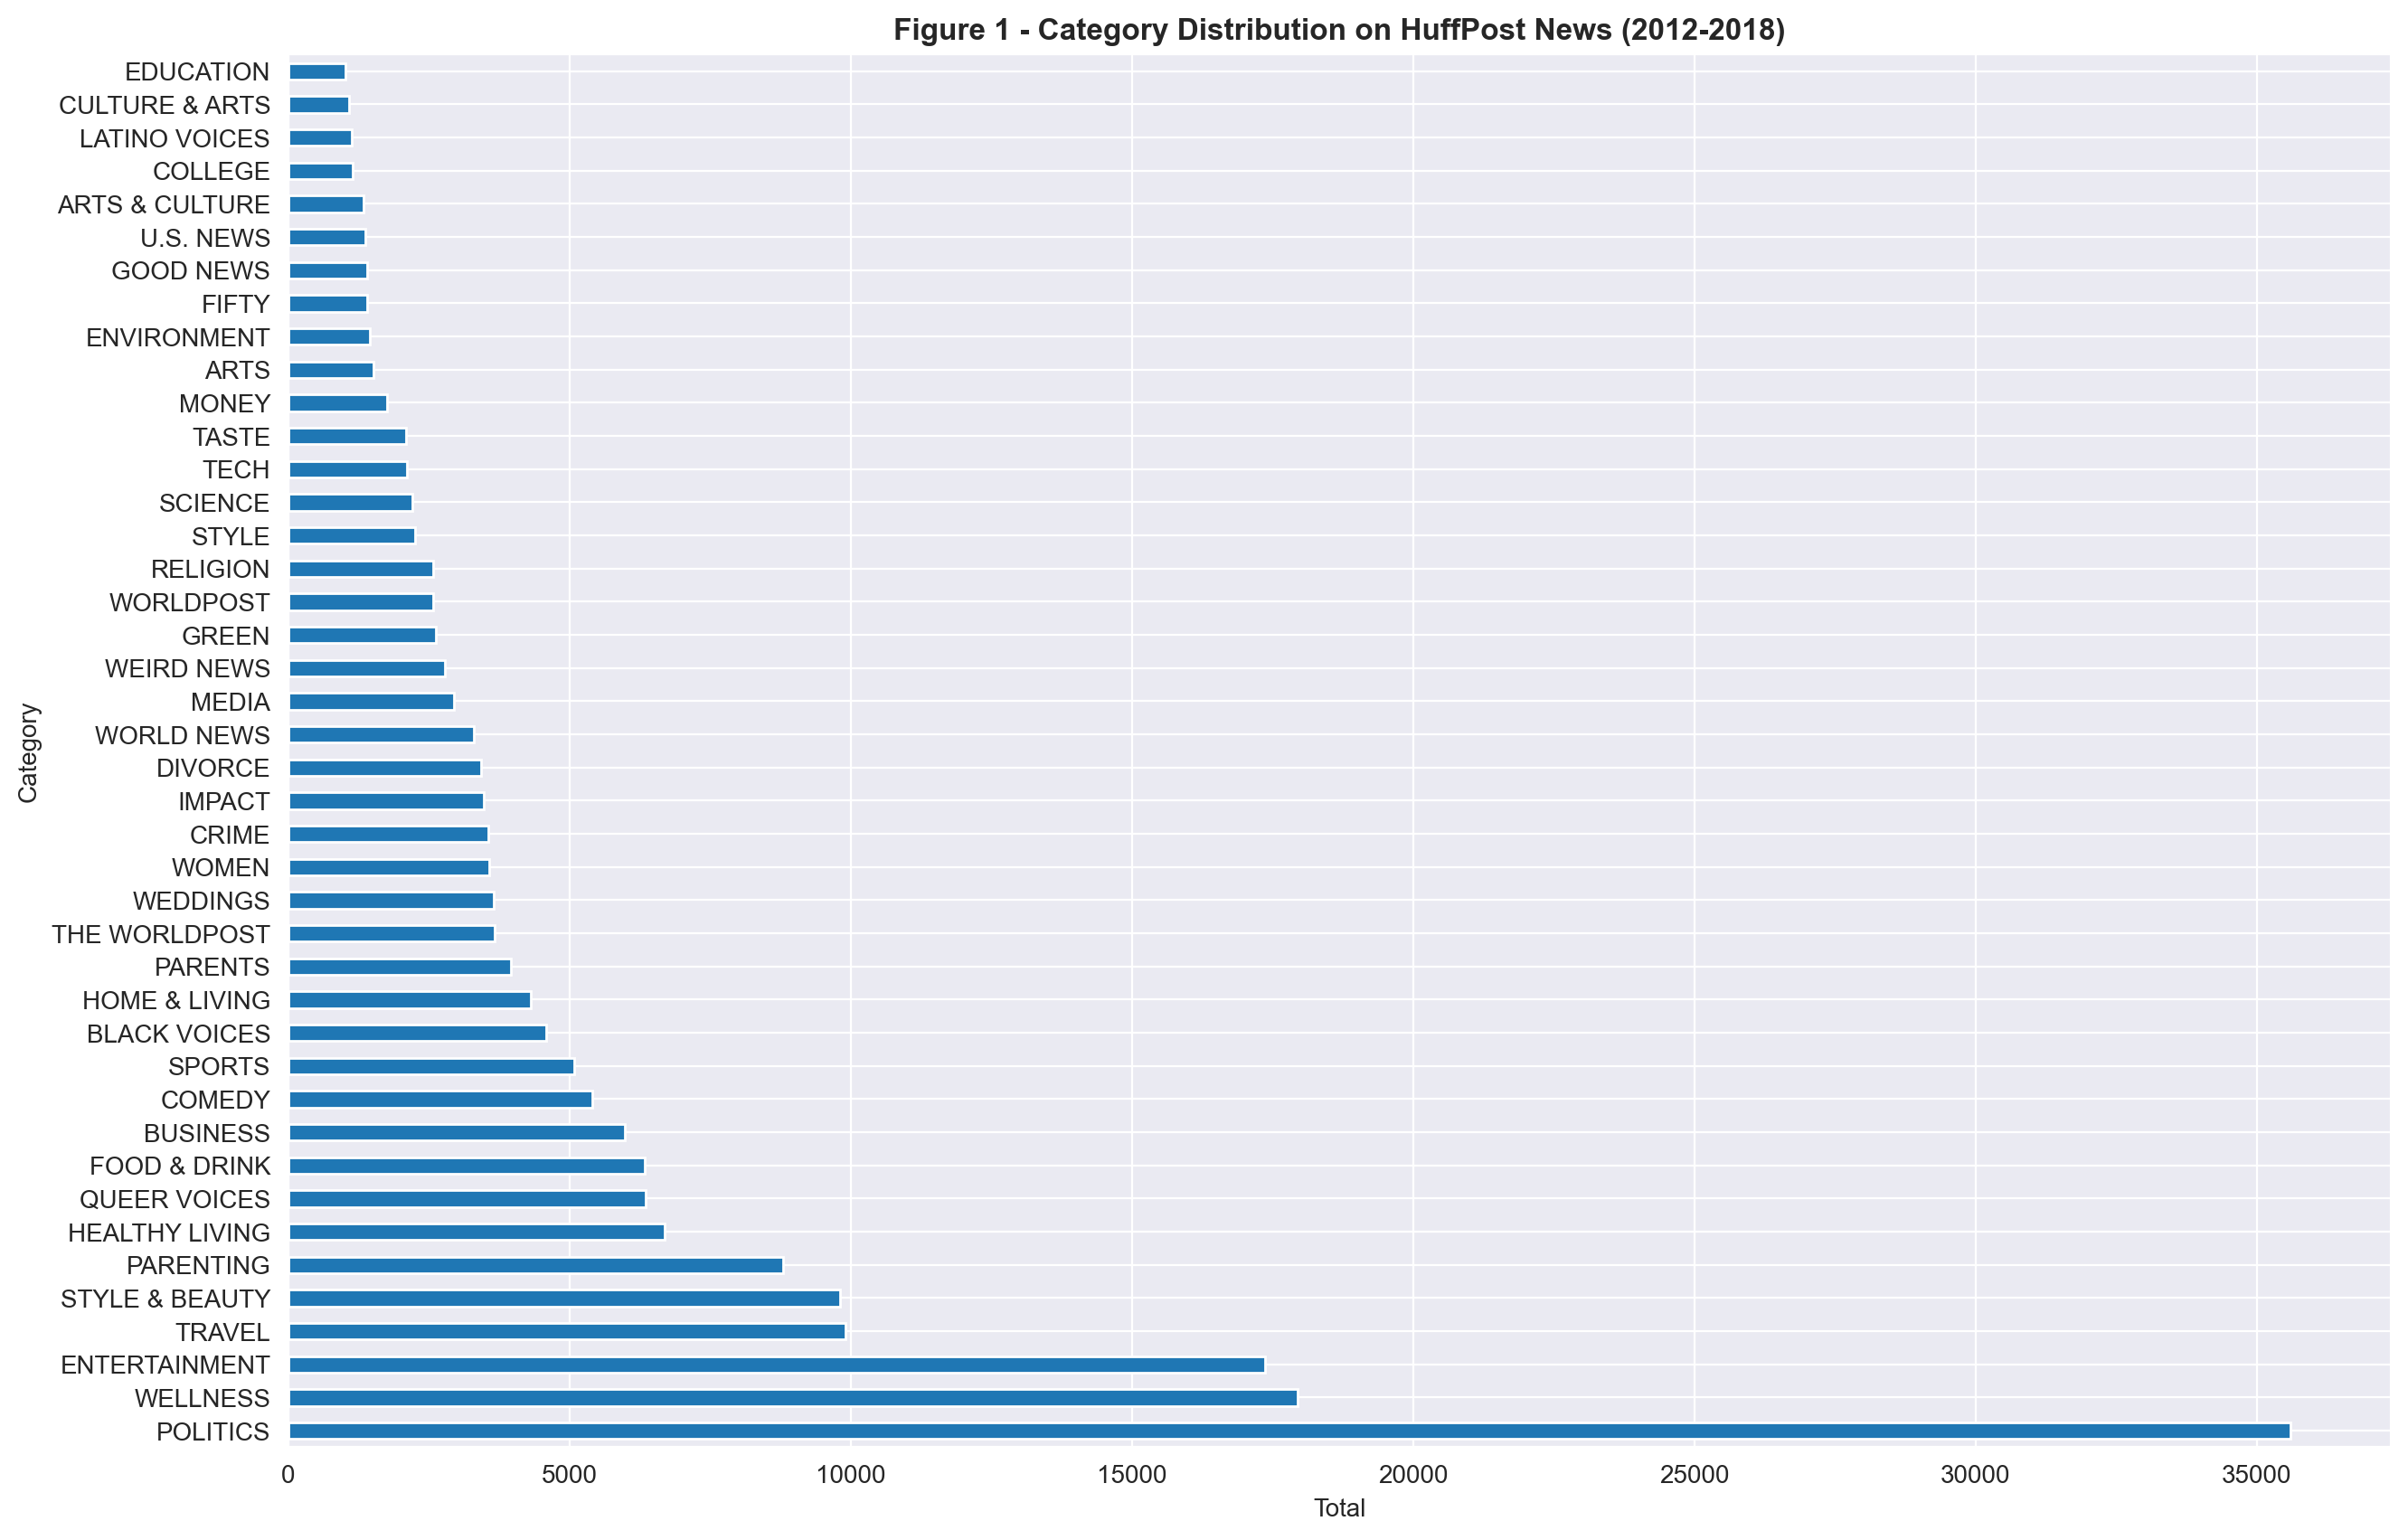

In [8]:
news_applications['category'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Category")
plt.title("Figure 1 - Category Distribution on HuffPost News (2012-2018)",
fontweight="bold", size=12);

In [9]:
news_applications['category'] = news_applications['category'].apply(lambda item: item.lower())

Memory metrics

Exploring dataset

In [10]:
news_applications.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [11]:
news_applications['category'].unique()

['u.s. news', 'comedy', 'parenting', 'world news', 'culture & arts', ..., 'good news', 'worldpost', 'fifty', 'arts', 'divorce']
Length: 42
Categories (42, object): ['arts', 'arts & culture', 'black voices', 'business', ..., 'wellness', 'women', 'world news', 'worldpost']

Handling categories & Unifying them

In [12]:
news_applications['category'] = news_applications['category'].replace(
    {
        "culture & arts": "arts & culture",
        "business": "business & finances",
        "money": "business & financies",
        "science": "science & tech",
        "tech": "science & tech",
        "weddings": "family culture",
        "divorce": "family culture",
        "college": "education",
        "fifty": "miscellanious",
        "good news": "miscellanious",
        "arts": "arts & culture",
        "the worldpost": "world news",
        "worldpost": "world news",
        "parents": "parenting",
        "style": "style & beauty",
        "black voices": "voices",
        "latino voices": "voices",
        "queer voices": "voices",
    }
)


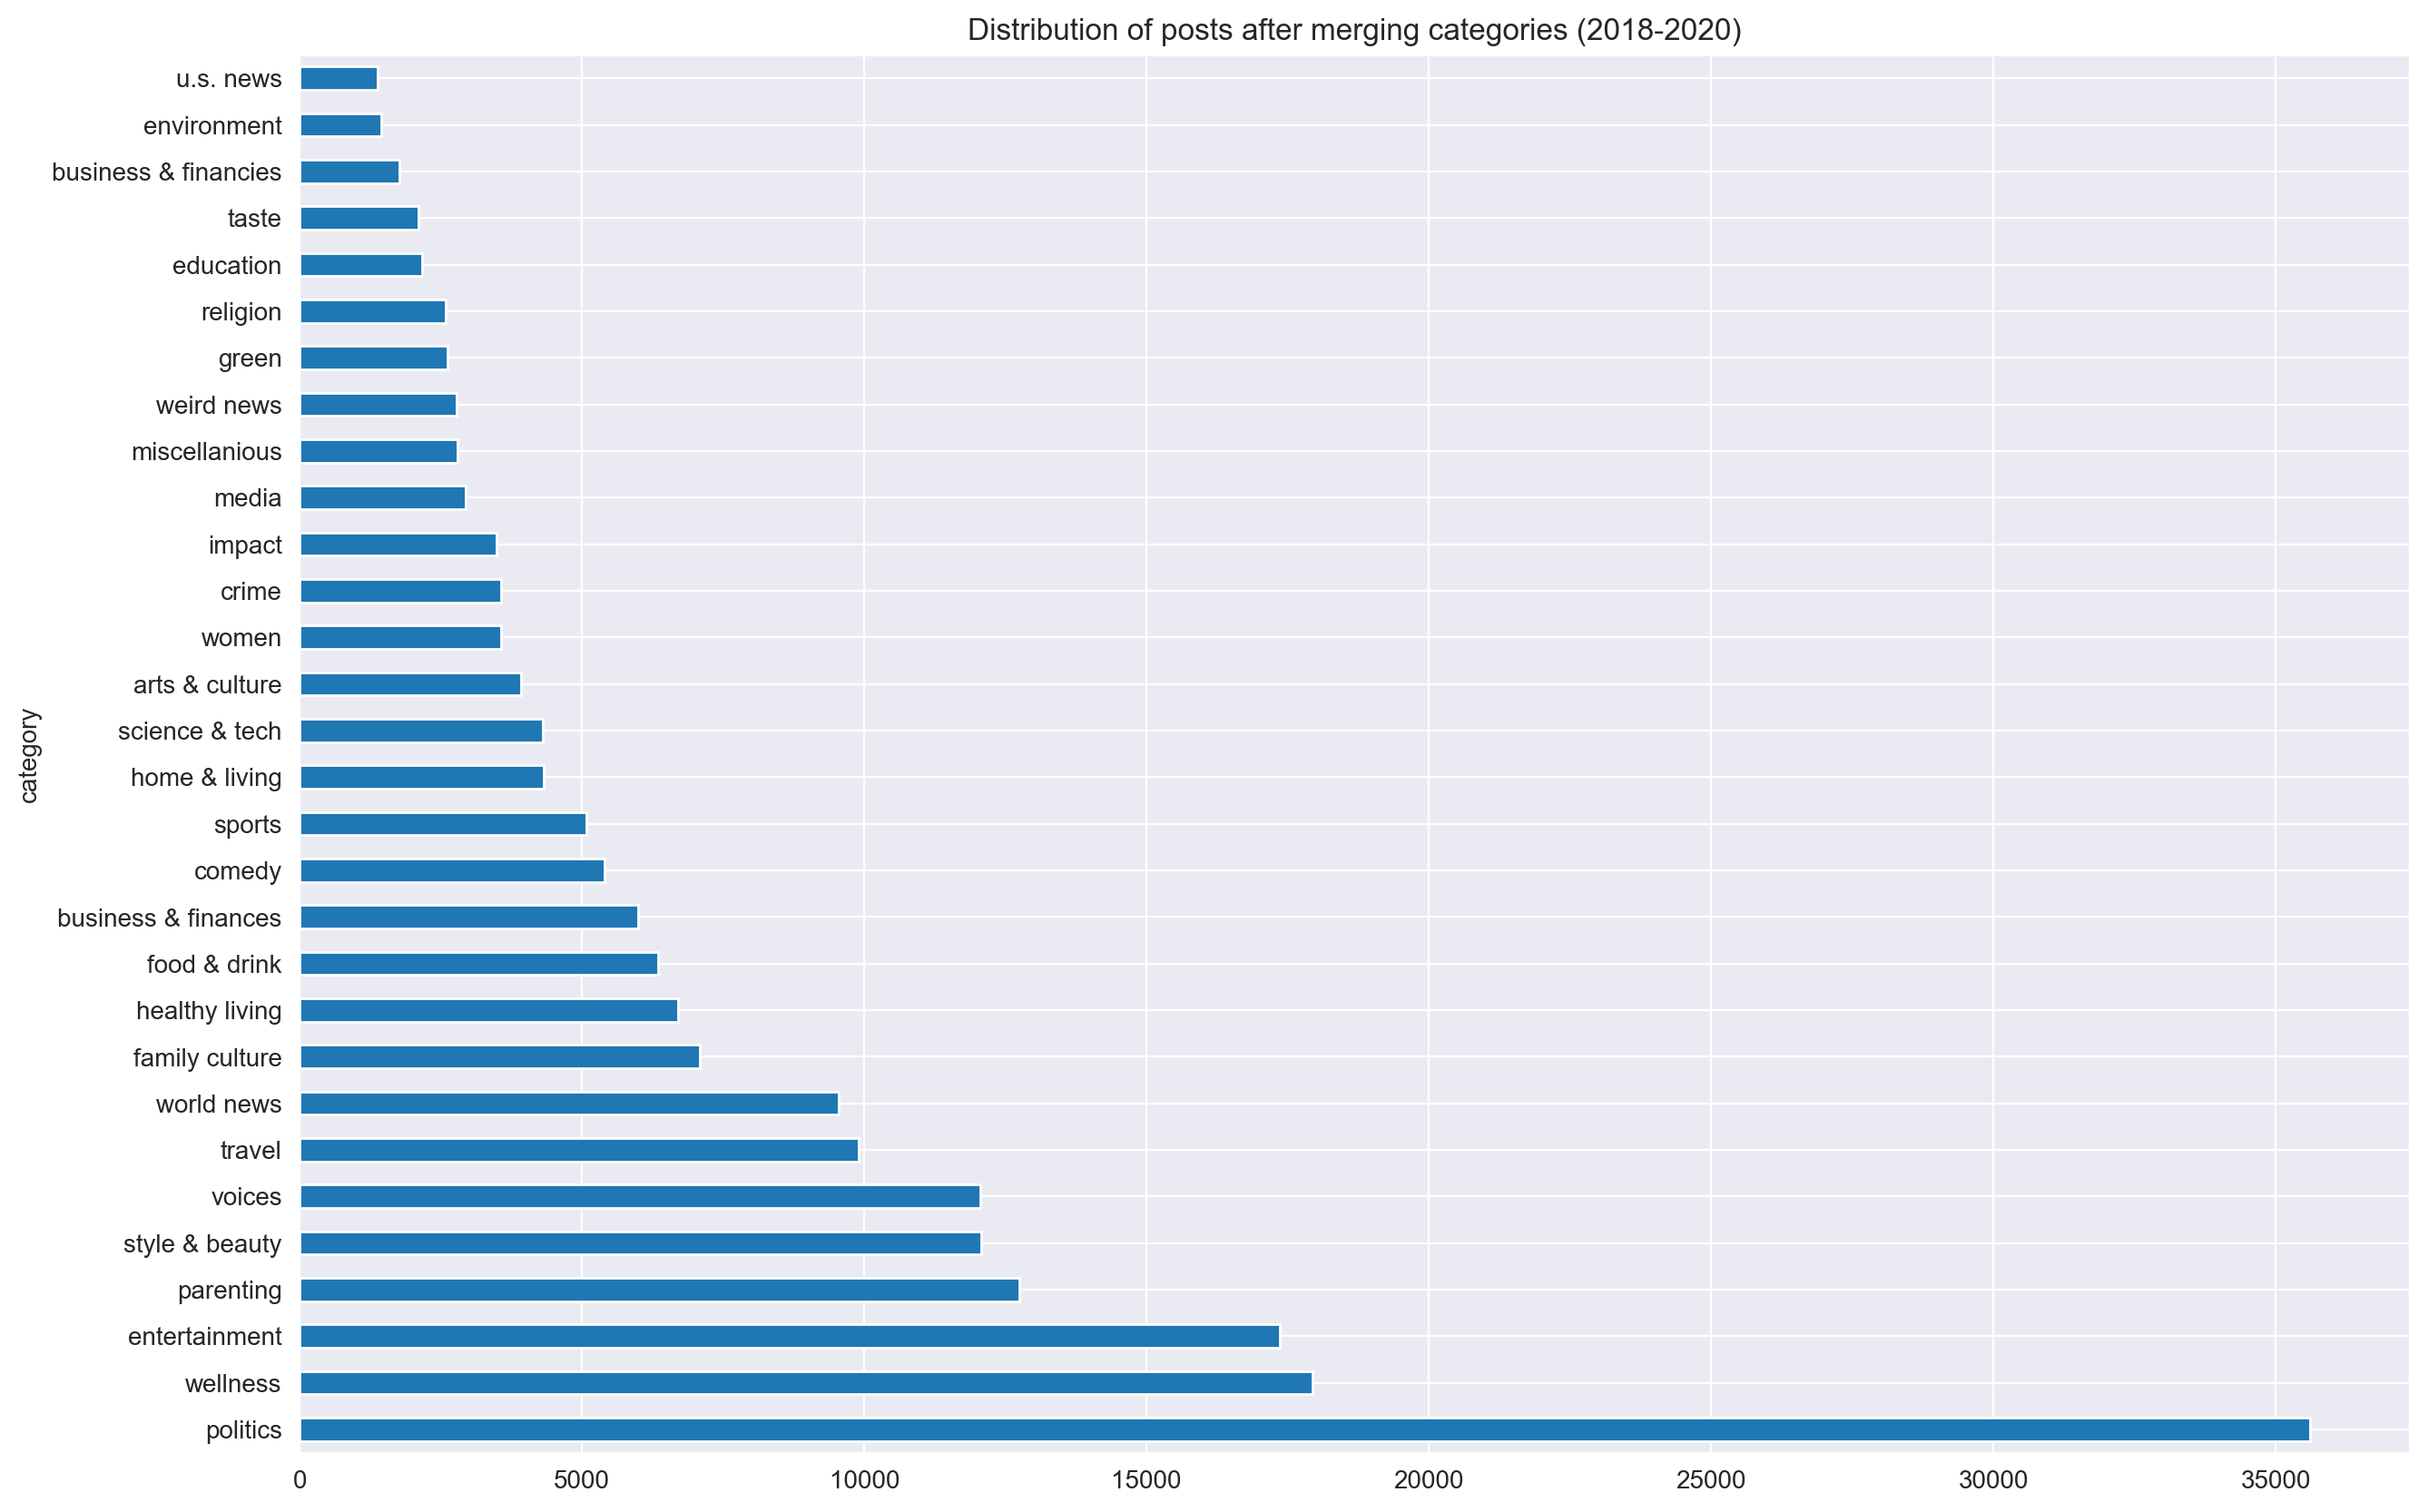

In [13]:
news_applications['category'].value_counts().plot(kind='barh', figsize=(15, 10))
plt.title('Distribution of posts after merging categories (2018-2020)') 
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'arts & culture'),
  Text(1, 0, 'voices'),
  Text(2, 0, 'business & finances'),
  Text(3, 0, 'comedy'),
  Text(4, 0, 'crime'),
  Text(5, 0, 'family culture'),
  Text(6, 0, 'education'),
  Text(7, 0, 'entertainment'),
  Text(8, 0, 'environment'),
  Text(9, 0, 'miscellanious'),
  Text(10, 0, 'food & drink'),
  Text(11, 0, 'green'),
  Text(12, 0, 'healthy living'),
  Text(13, 0, 'home & living'),
  Text(14, 0, 'impact'),
  Text(15, 0, 'media'),
  Text(16, 0, 'business & financies'),
  Text(17, 0, 'parenting'),
  Text(18, 0, 'politics'),
  Text(19, 0, 'religion'),
  Text(20, 0, 'science & tech'),
  Text(21, 0, 'sports'),
  Text(22, 0, 'style & beauty'),
  Text(23, 0, 'taste'),
  Text(24, 0, 'travel'),
  Text(25, 0, 'u.s. news'),
  Text(26, 0, 'weird news'),
  Text(27, 0, 'wellness'),
  Text(28, 0, 'women'),
  Text(29, 0, 'world news')])

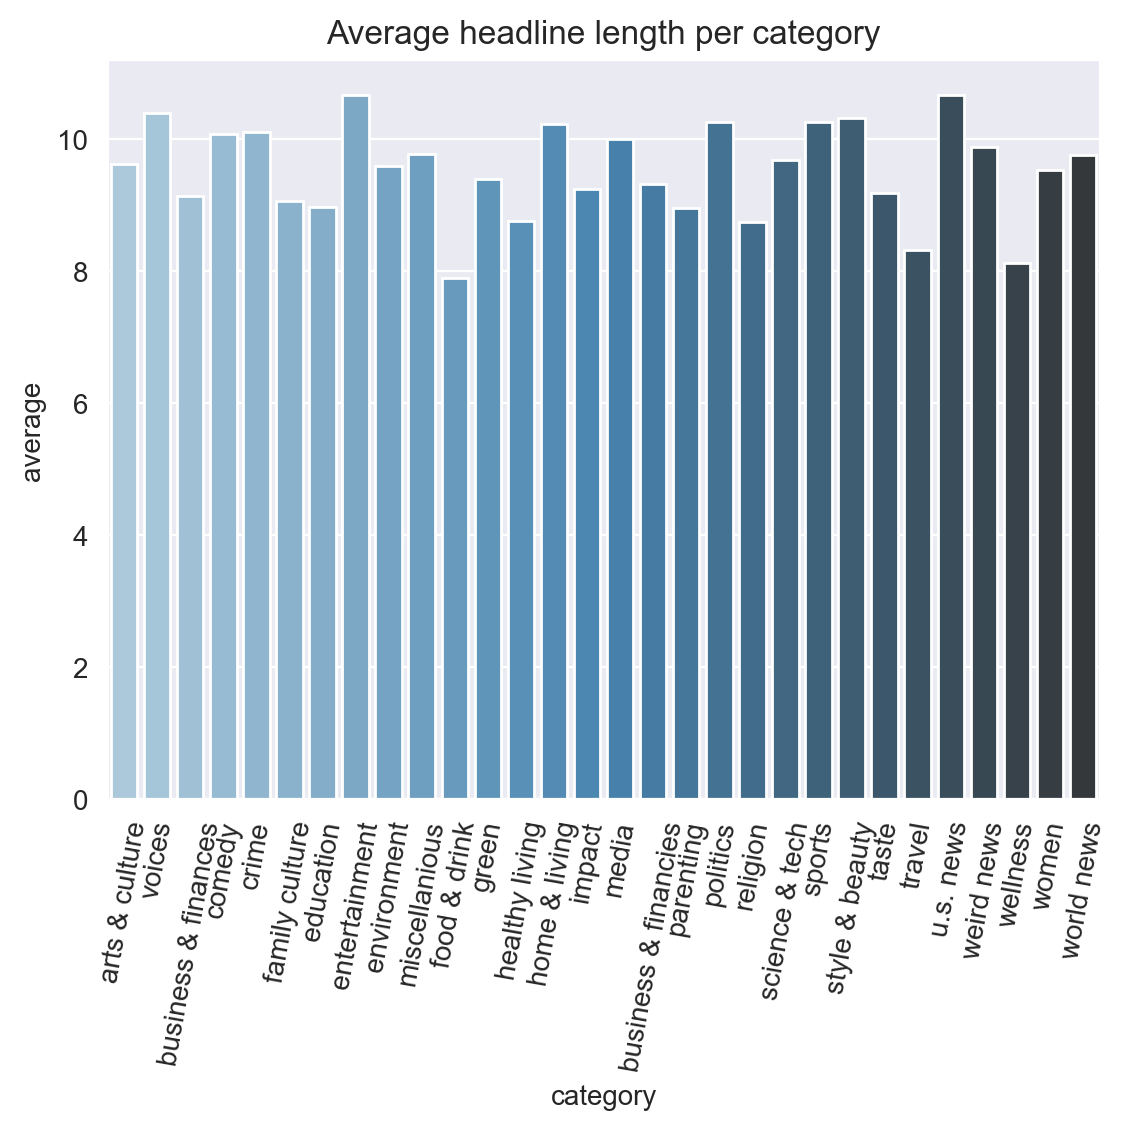

In [14]:
aux = [] 
categories = news_applications['category'].unique()

for category in categories:
    samples = news_applications[news_applications['category'] == category]
    aux.append(numpy.mean(samples['headline'].apply(lambda item: len(item.split()))))

df_aux = pandas.DataFrame(
    {
        "category": categories,
        'average': aux
    }
)

asc_values = df_aux.sort_values('average', ascending=True).reset_index()
sns.barplot(x=asc_values['category'], y=asc_values['average'], palette='Blues_d')
plt.title("Average headline length per category")
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'arts & culture'),
  Text(1, 0, 'voices'),
  Text(2, 0, 'business & finances'),
  Text(3, 0, 'comedy'),
  Text(4, 0, 'crime'),
  Text(5, 0, 'family culture'),
  Text(6, 0, 'education'),
  Text(7, 0, 'entertainment'),
  Text(8, 0, 'environment'),
  Text(9, 0, 'miscellanious'),
  Text(10, 0, 'food & drink'),
  Text(11, 0, 'green'),
  Text(12, 0, 'healthy living'),
  Text(13, 0, 'home & living'),
  Text(14, 0, 'impact'),
  Text(15, 0, 'media'),
  Text(16, 0, 'business & financies'),
  Text(17, 0, 'parenting'),
  Text(18, 0, 'politics'),
  Text(19, 0, 'religion'),
  Text(20, 0, 'science & tech'),
  Text(21, 0, 'sports'),
  Text(22, 0, 'style & beauty'),
  Text(23, 0, 'taste'),
  Text(24, 0, 'travel'),
  Text(25, 0, 'u.s. news'),
  Text(26, 0, 'weird news'),
  Text(27, 0, 'wellness'),
  Text(28, 0, 'women'),
  Text(29, 0, 'world news')])

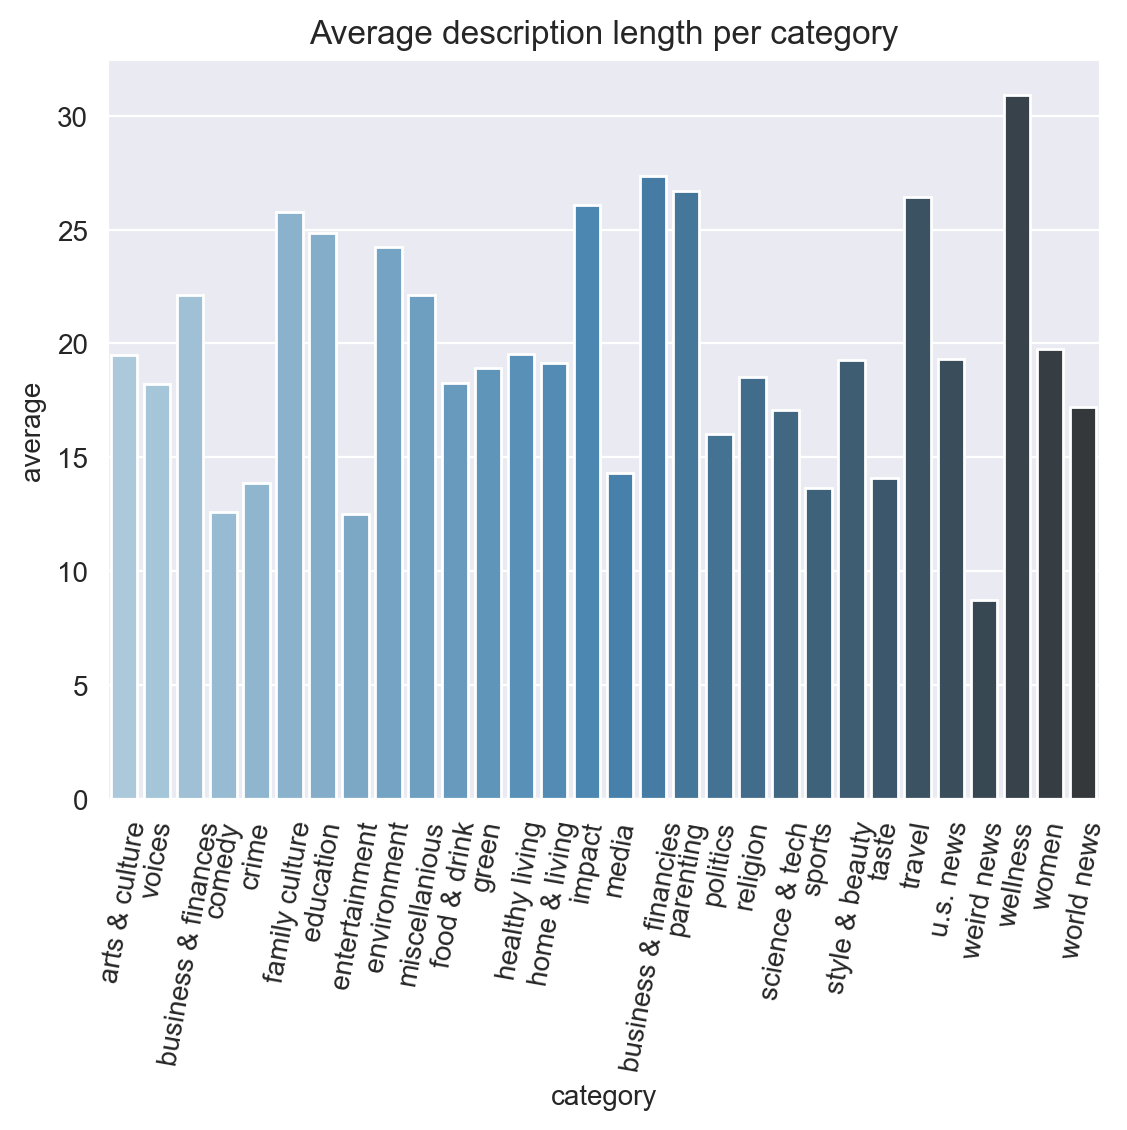

In [15]:
aux = [] 
categories = news_applications['category'].unique()

for category in categories:
    samples = news_applications[news_applications['category'] == category]
    aux.append(numpy.mean(samples['short_description'].apply(lambda item: len(item.split()))))

df_aux = pandas.DataFrame(
    {
        "category": categories,
        'average': aux
    }
)

asc_values = df_aux.sort_values('average', ascending=True).reset_index()
sns.barplot(x=asc_values['category'], y=asc_values['average'], palette='Blues_d')
plt.title("Average description length per category")
plt.xticks(rotation=80)

How publish changed over the years

In [16]:
news_applications['year'] = news_applications['date'].dt.year
posts = news_applications['year'].value_counts()

<Axes: ylabel='count'>

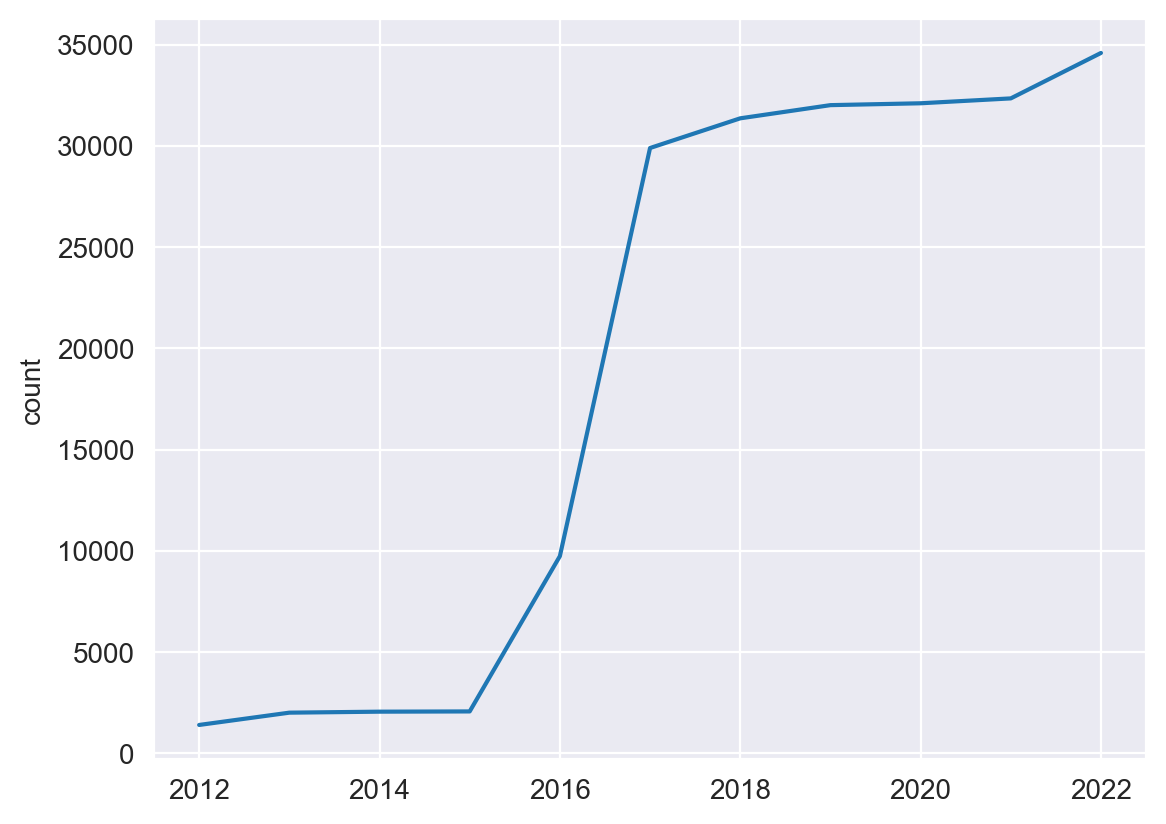

In [17]:
sns.lineplot(x=news_applications['year'].unique(), y=posts)

<Axes: title={'center': 'Figure 6(b) - News Category Distribution (2017)'}, xlabel='category'>

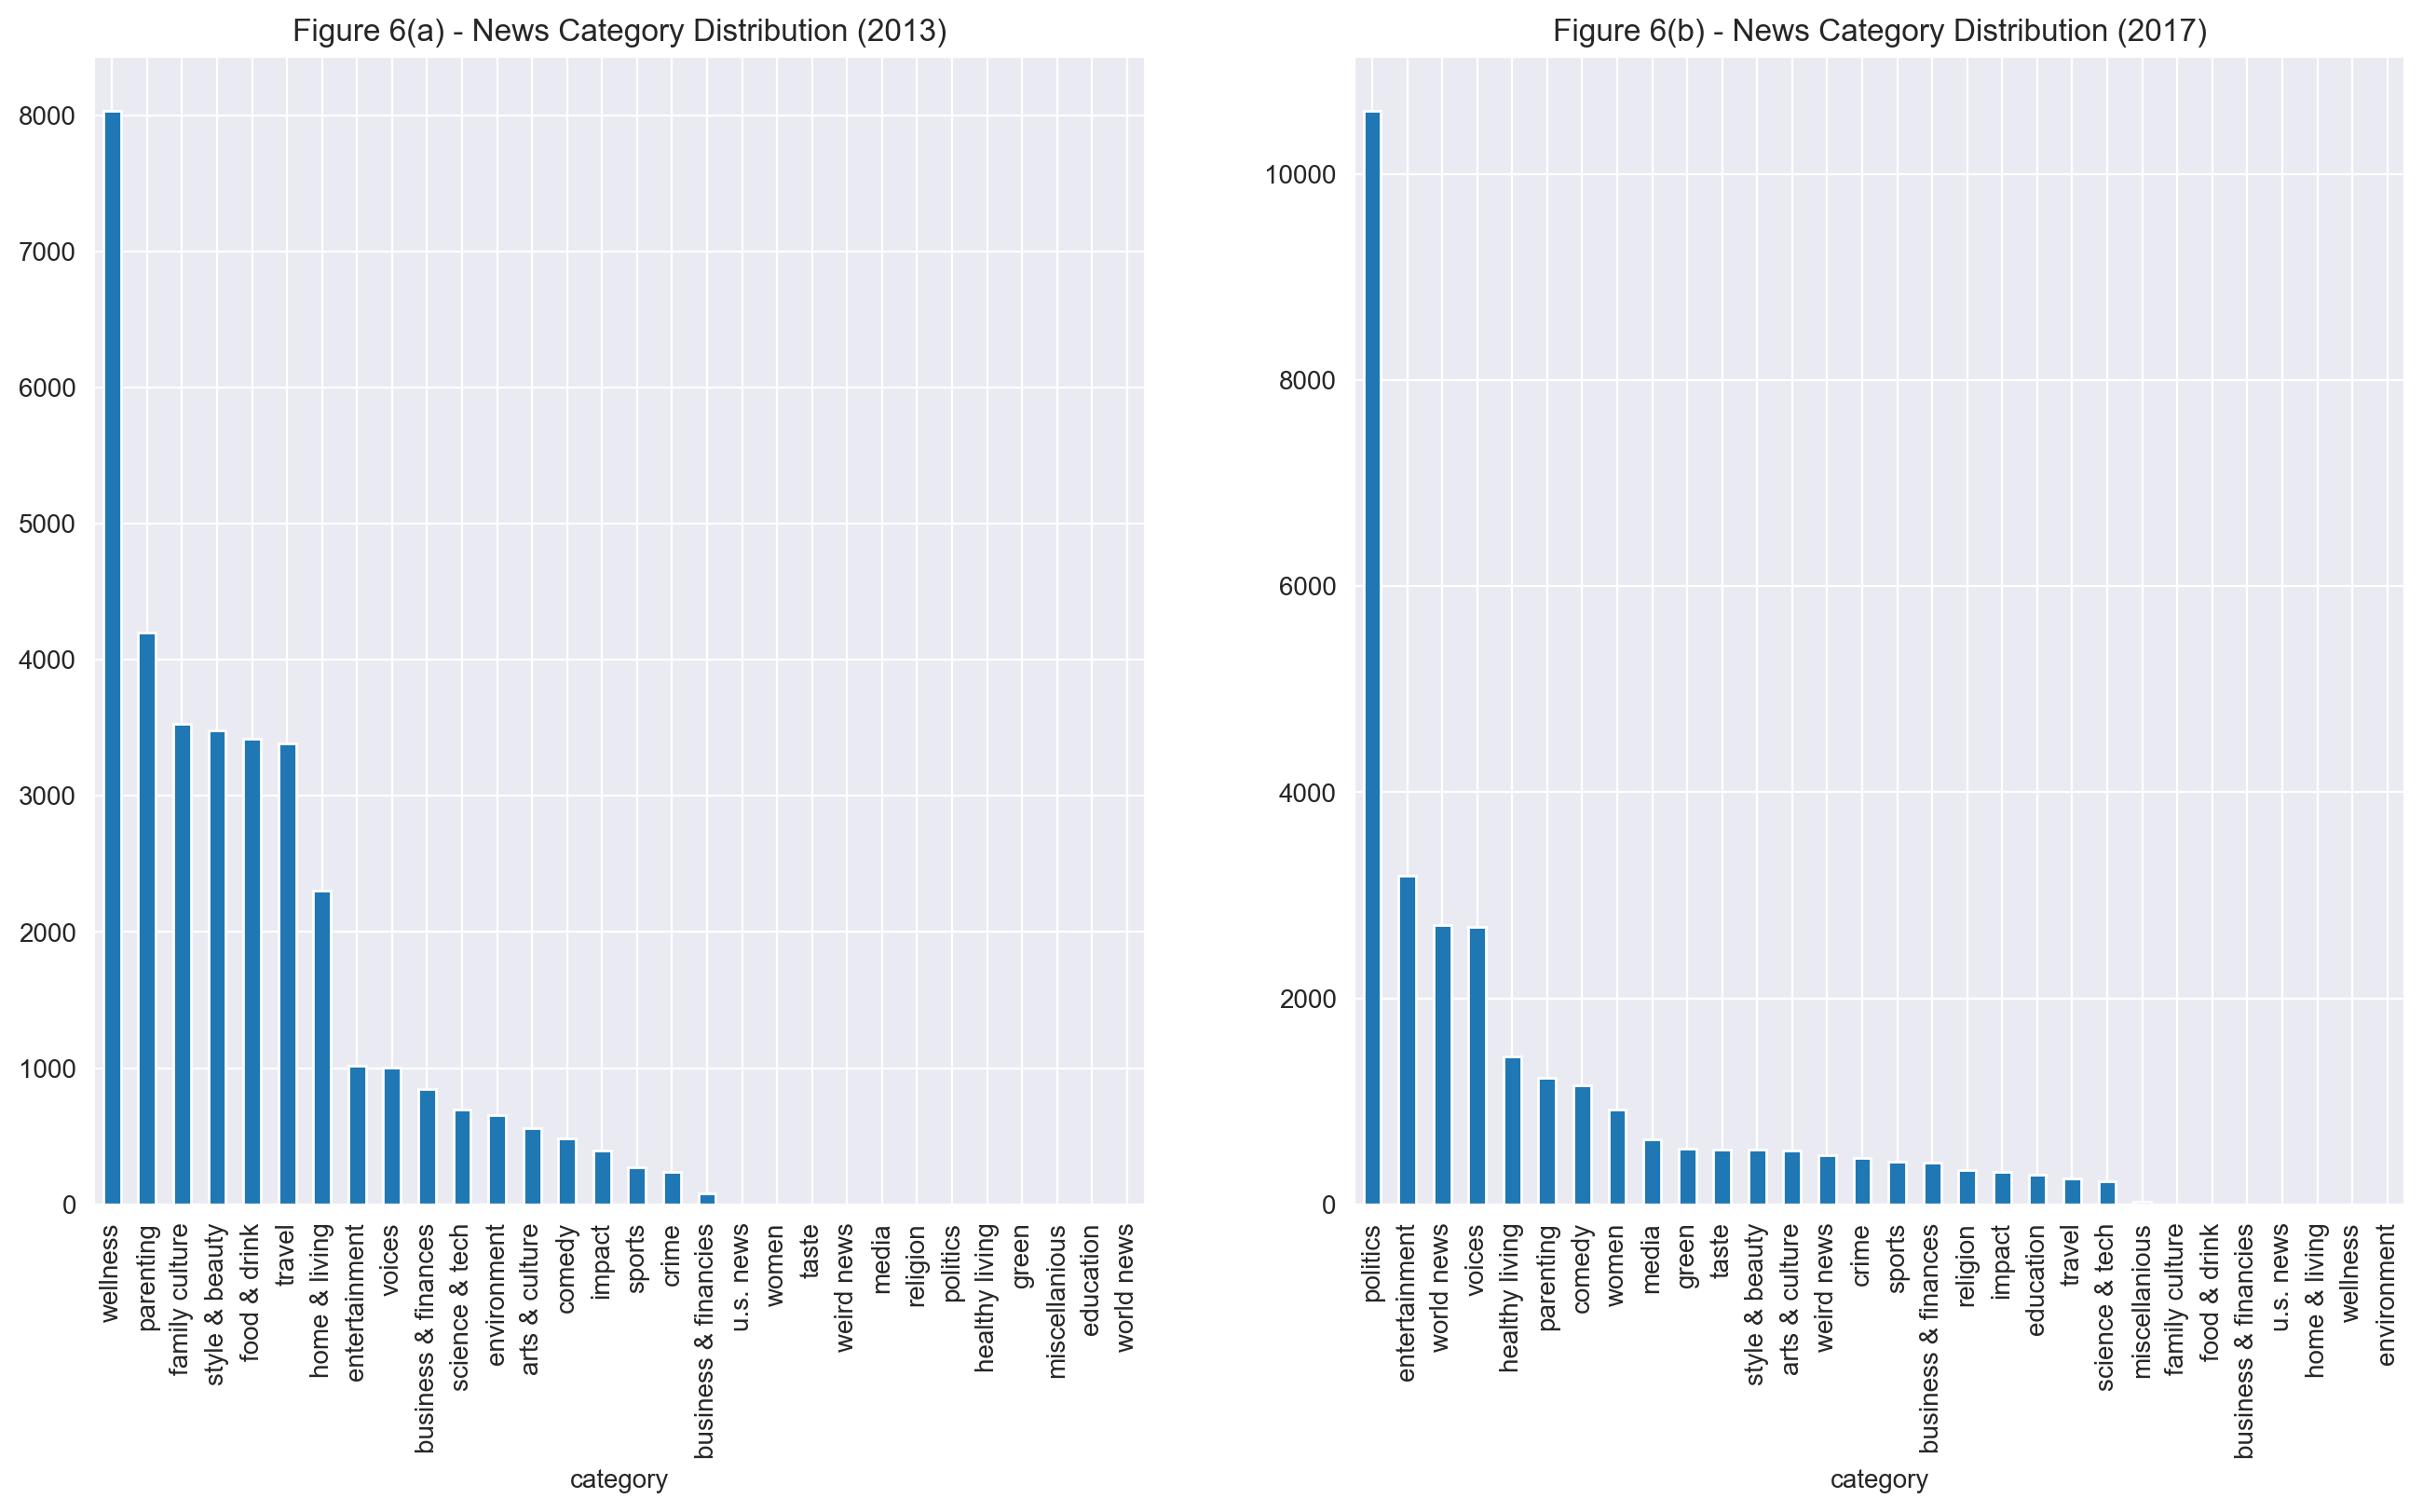

In [18]:
posts_2017 = news_applications[news_applications['year'] == 2017]
posts_2013 = news_applications[news_applications['year'] == 2013] 


fig, axes = plt.subplots(nrows=1, ncols=2)
posts_2013['category'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axes[0], figsize=(166,8),
title="Figure 6(a) - News Category Distribution (2013)")

posts_2017['category'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=axes[1], figsize=(16,8), 
title="Figure 6(b) - News Category Distribution (2017)")

Let's find most popular words for 2013 year across all short descriptions

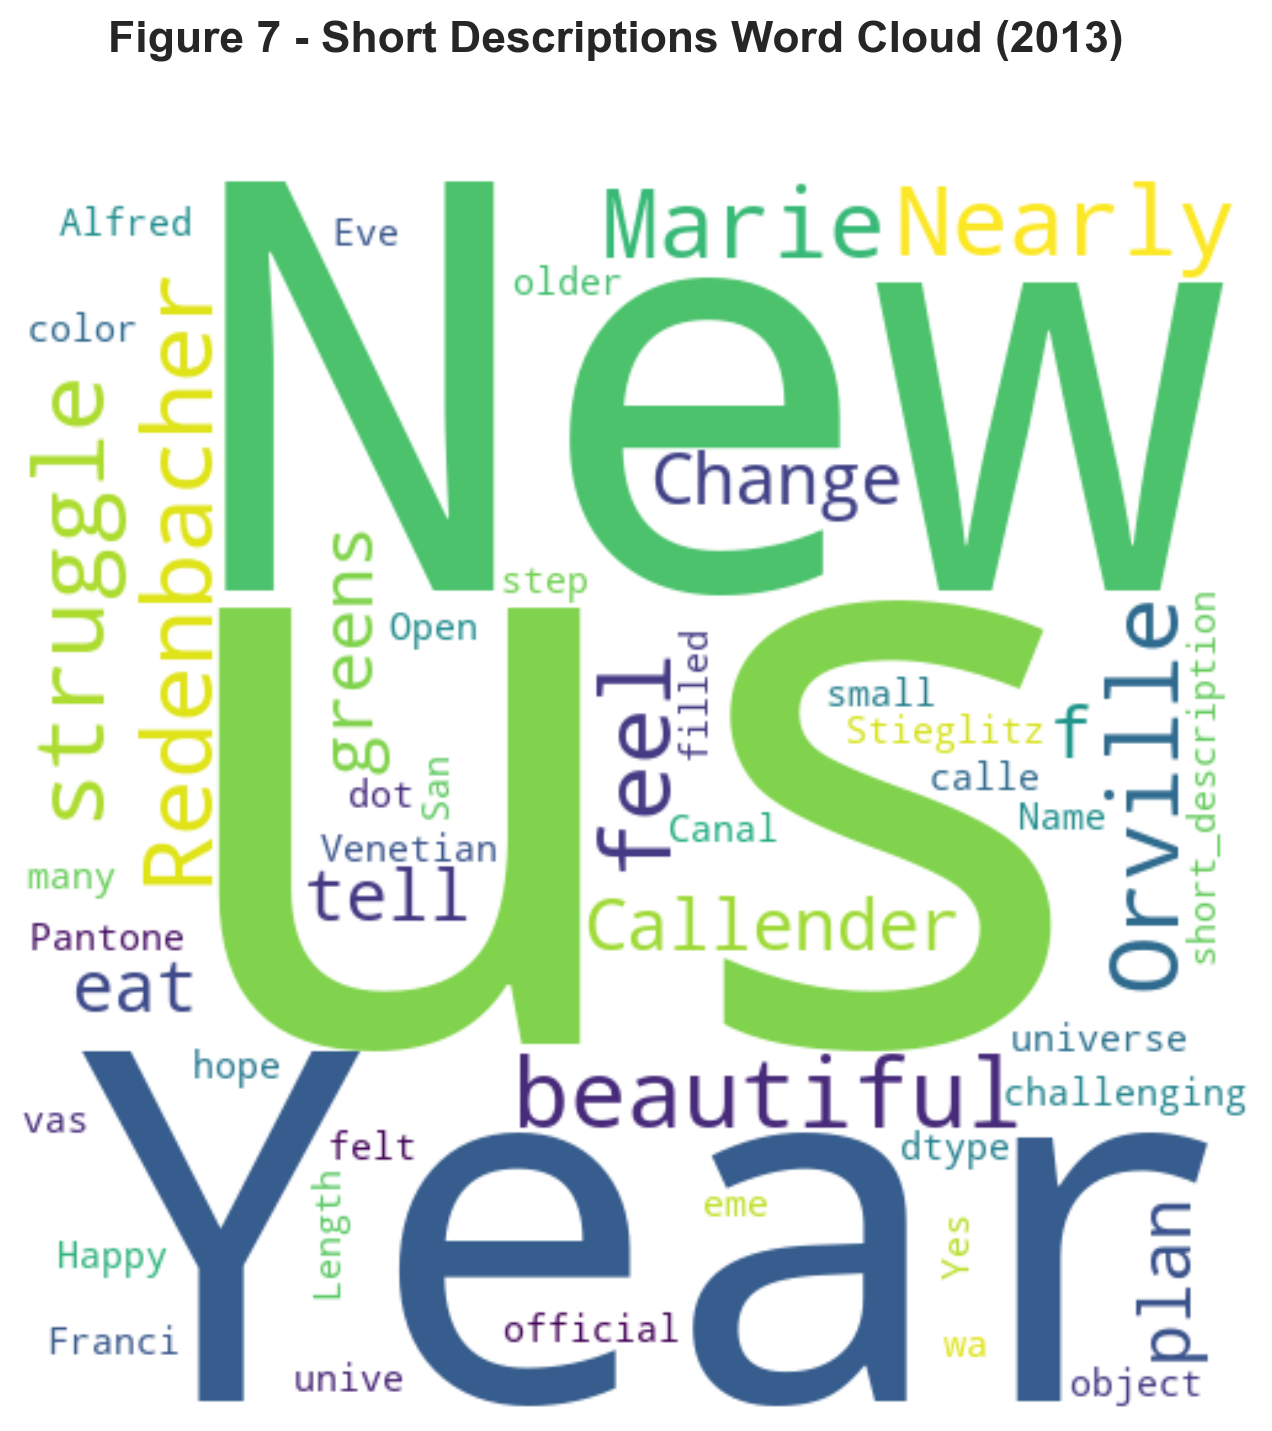

In [19]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)

wordcloud.generate(str(news_applications.query('year == 2013')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Figure 7 - Short Descriptions Word Cloud (2013)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Let's find key words for 2017 year in short descriptions

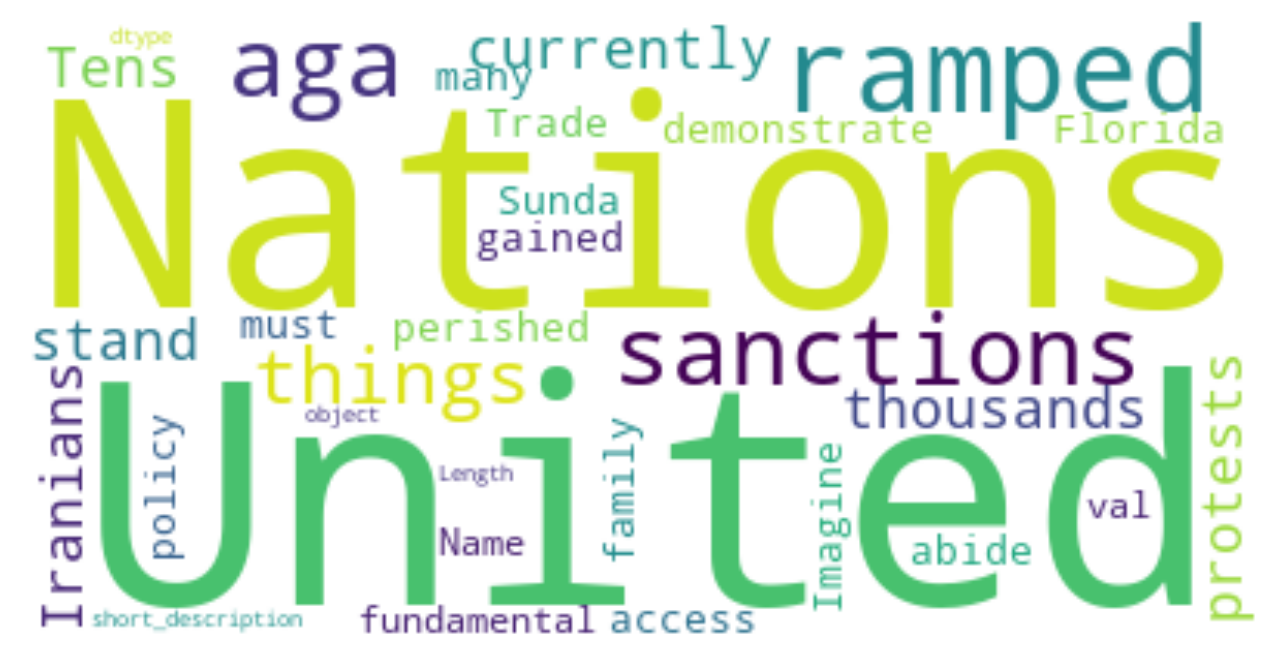

In [20]:
cloud = WordCloud(
    background_color='white'
)

cloud.generate(str(news_applications.query('year == 2017')['short_description']))
plt.axis('off') 
plt.rcParams['figure.figsize'] = (8, 8)
plt.imshow(cloud, interpolation='bilinear') 
plt.show()


In [21]:
news_per_cat = news_applications.groupby("category").agg(total_posts=('category','count')).reset_index().sort_values('total_posts', ascending=False)

In [22]:
news_per_cat

,category,total_posts
18,politics,35602
27,wellness,17945
7,entertainment,17362
17,parenting,12746
22,style & beauty,12068
1,voices,12060
24,travel,9900
29,world news,9542
5,family culture,7079
12,healthy living,6694


Text(0.5, 1.0, 'Number of posts per category')

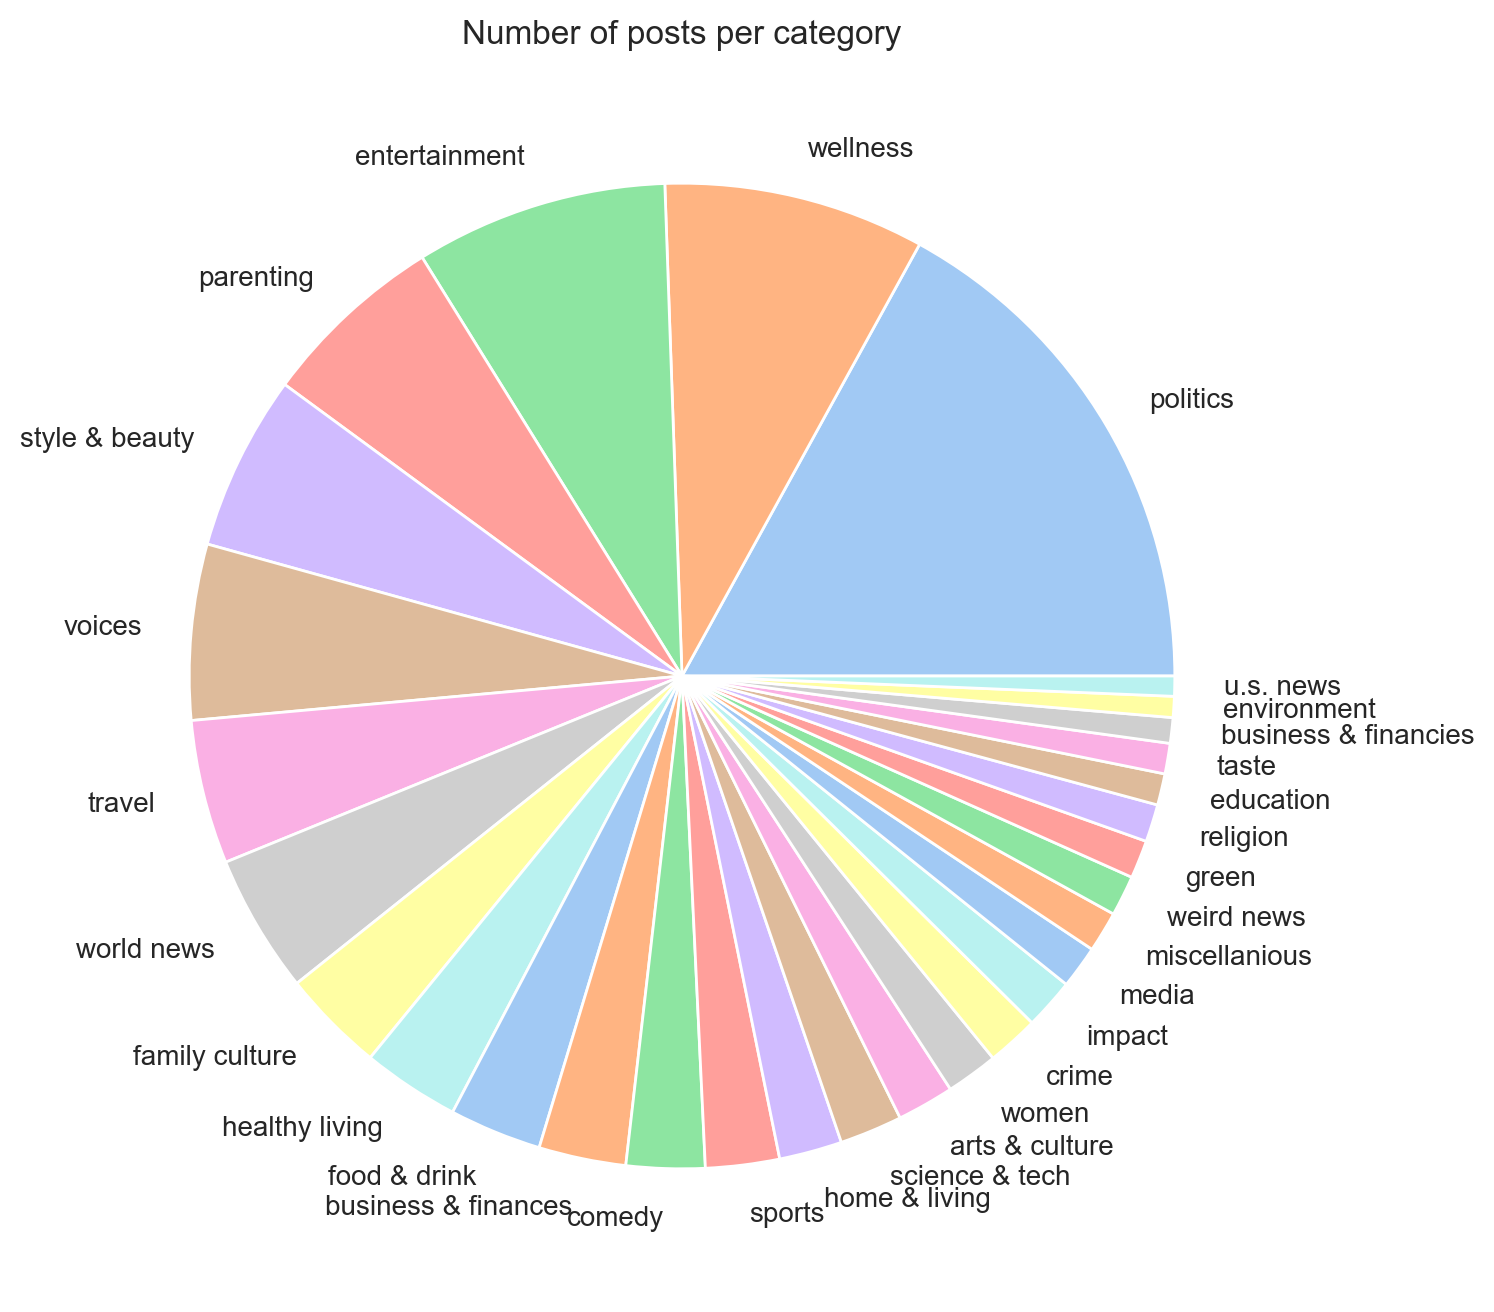

In [23]:
colors = sns.color_palette('pastel')[:news_per_cat['category'].shape[0]]
plt.pie(news_per_cat['total_posts'], labels=news_per_cat['category'], colors=colors)
plt.title("Number of posts per category")

In [24]:
news_applications

,link,headline,category,short_description,authors,date,year
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,u.s. news,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,2022
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",u.s. news,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,2022
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,comedy,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,2022
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,parenting,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,2022
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,u.s. news,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,2022
...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,science & tech,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,2012
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,sports,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,2012
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",sports,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,2012
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,sports,CORRECTION: An earlier version of this story i...,,2012-01-28,2012


Let's visualize what days are the most popular for people to post topics per category

Saving Dataset

In [25]:
pickle.dump(news_applications, open("../data/compressed_data/category_dataset.pkl", mode='wb'))